In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


load data into dataframe

In [2]:
data = pd.read_csv('/content/datasets_549966_1296705_complete.csv')

In [3]:
data.head(5)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [4]:
data.shape

(3510, 10)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3510 non-null   object 
 1   Name of State / UT         3510 non-null   object 
 2   Latitude                   3510 non-null   float64
 3   Longitude                  3510 non-null   float64
 4   Total Confirmed cases      3510 non-null   int64  
 5   Death                      3510 non-null   int64  
 6   Cured/Discharged/Migrated  3510 non-null   int64  
 7   New cases                  3510 non-null   int64  
 8   New deaths                 3510 non-null   int64  
 9   New recovered              3510 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 274.3+ KB
None


In [6]:
data_india = data.groupby('Date').sum()

In [7]:
data_india.tail()

,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,
2020-06-25,817.4984,2872.458,464612,14894,271697,16570,418,13012
2020-06-27,817.4984,2872.458,500930,15685,295881,36318,791,24184
2020-06-28,817.4984,2872.458,521020,16095,309713,20090,410,13832
2020-06-29,817.4984,2872.458,541033,16475,321723,20013,380,12010
2020-06-30,817.4984,2872.458,559836,16893,334822,18803,418,13099


In [8]:
data_num_india = data.groupby('Date')["Total Confirmed cases", "Cured/Discharged/Migrated", "Death"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [9]:
data_num_india.head(5)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0


In [10]:
datakerala = data.loc[data['Name of State / UT']=='Kerala']
#df.loc[df['column_name'] == some_value]
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

In [11]:
datakerala

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3351,2020-06-25,Kerala,10.8505,76.2711,3603,22,1888,152,0,79
3386,2020-06-27,Kerala,10.8505,76.2711,3876,22,2008,273,0,120
3421,2020-06-28,Kerala,10.8505,76.2711,4071,22,2110,195,0,102
3456,2020-06-29,Kerala,10.8505,76.2711,4189,22,2152,118,0,42


data is updated till 30th june

In [12]:
data_num_india.tail(2)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-06-29,541033,321723,16475
2020-06-30,559836,334822,16893


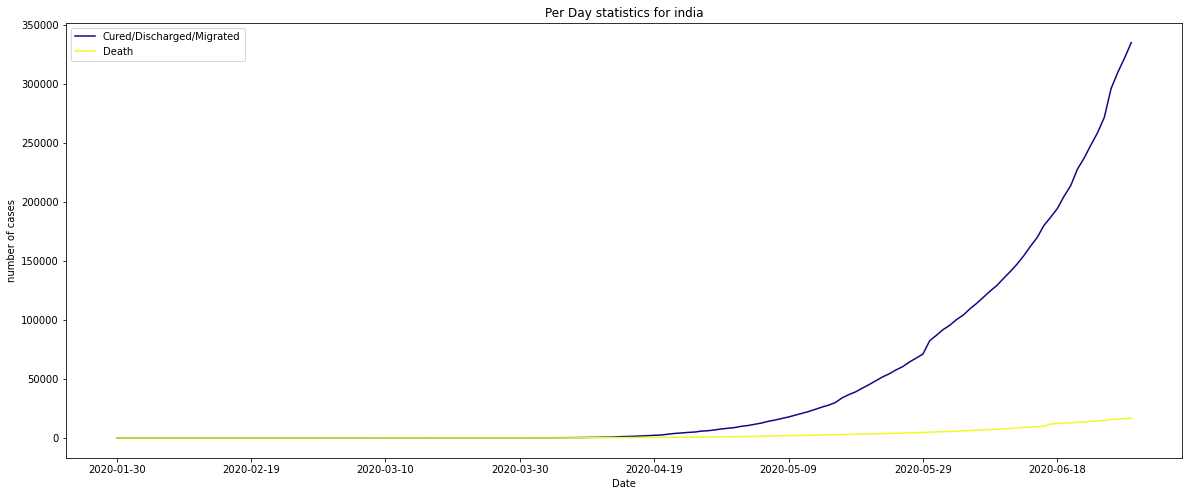

In [61]:
data_num_india.plot(figsize=(20,8),title='Per Day statistics for india',colormap='plasma')
plt.ylabel('number of cases') 
plt.show()
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

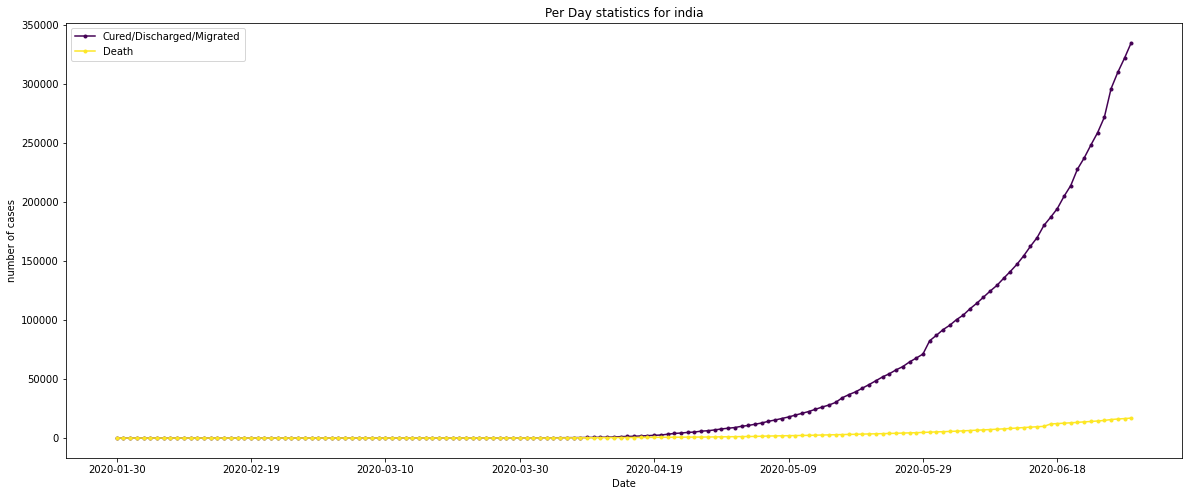

In [62]:
data_num_india.plot(figsize=(20,8),title='Per Day statistics for india',colormap='viridis',marker='.')
plt.ylabel('number of cases') 
plt.show()
#https://matplotlib.org/3.1.1/api/markers_api.html

In [15]:
data_num_india.head(3)


,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0


In [16]:
data_num_india.head(1)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0


In [17]:
ds = datakerala.iloc[:,0]


In [18]:
ds.reset_index(drop=True, inplace=True)       # used for reseting index very usefull

In [19]:
ds

0      2020-01-30
1      2020-01-31
2      2020-02-01
3      2020-02-02
4      2020-02-03
          ...    
147    2020-06-25
148    2020-06-27
149    2020-06-28
150    2020-06-29
151    2020-06-30
Name: Date, Length: 152, dtype: object

In [20]:
type(ds)

pandas.core.series.Series

In [21]:
ya = data_num_india.pop('Total Confirmed cases')
ya.reset_index(drop=True, inplace=True)

In [22]:
ya


0           1
1           1
2           2
3           3
4           3
        ...  
147    464612
148    500930
149    521020
150    541033
151    559836
Name: Total Confirmed cases, Length: 152, dtype: int64

In [23]:
!pip install fbprophet

In [24]:
from fbprophet import Prophet
prophet_basic = Prophet()

In [25]:
input= pd.DataFrame()
input['ds'] = pd.to_datetime(ds)
input['y']=ya
input.head(2)

,ds,y
0,2020-01-30,1
1,2020-01-31,1


In [26]:
prophet_basic.fit(input)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
input

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
147,2020-06-25,464612
148,2020-06-27,500930
149,2020-06-28,521020
150,2020-06-29,541033


In [28]:
future= prophet_basic.make_future_dataframe(periods=10)
future.tail(2)

,ds
160,2020-07-09
161,2020-07-10


In [29]:
forecast=prophet_basic.predict(future)

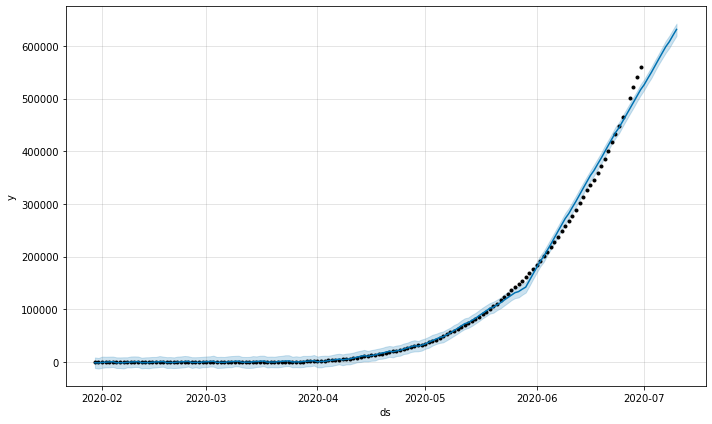

In [30]:
from fbprophet.plot import plot_plotly
fig1 =prophet_basic.plot(forecast)

In [31]:
predictions=forecast.tail(10)

In [32]:
predictions.round(0).head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
152,2020-07-01,527270.0,516271.0,536632.0,527270.0,527270.0,-920.0,-920.0,-920.0,-920.0,-920.0,-920.0,0.0,0.0,0.0,526349.0
153,2020-07-02,538915.0,528379.0,548217.0,538745.0,538956.0,-681.0,-681.0,-681.0,-681.0,-681.0,-681.0,0.0,0.0,0.0,538234.0
154,2020-07-03,550560.0,538917.0,559803.0,550030.0,550914.0,-906.0,-906.0,-906.0,-906.0,-906.0,-906.0,0.0,0.0,0.0,549654.0
155,2020-07-04,562205.0,552075.0,572360.0,561253.0,562893.0,-69.0,-69.0,-69.0,-69.0,-69.0,-69.0,0.0,0.0,0.0,562136.0
156,2020-07-05,573850.0,564433.0,584391.0,572420.0,574991.0,402.0,402.0,402.0,402.0,402.0,402.0,0.0,0.0,0.0,574252.0


In [33]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_basic, initial='70 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-05-18 00:00:00 and 2020-06-27 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.191418e+09,34516.923368,28298.800414,0.088662,0.088662,0.0
1,2 days,1.686173e+09,41063.037718,33959.711688,0.104183,0.104183,0.0
2,3 days,2.204492e+09,46952.021017,39115.629376,0.117366,0.117366,0.0


**Prediction usingusing ARIMA**

In [34]:
input

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
147,2020-06-25,464612
148,2020-06-27,500930
149,2020-06-28,521020
150,2020-06-29,541033


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



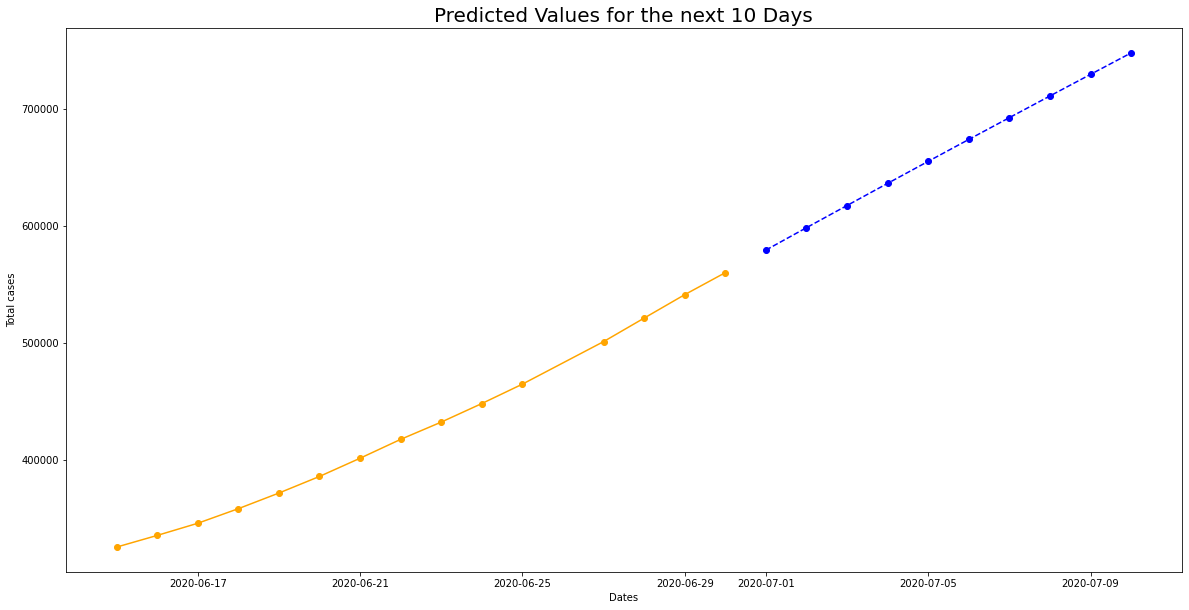

In [35]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(input['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 10)
pred = list(forecast[0])
start_date = input['ds'].max()
prediction_dates = []
for i in range(10):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

#all bellow stuff related to drawing graph   
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 10 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=input['y'].tail(15),x=input['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

In [36]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(30)

,Date,Predicted
0,2020-07-01,579124.049202
1,2020-07-02,598231.593492
2,2020-07-03,617179.415582
3,2020-07-04,636086.084522
4,2020-07-05,654886.432598
5,2020-07-06,673592.354674
6,2020-07-07,692211.005027
7,2020-07-08,710737.115189
8,2020-07-09,729172.817712
9,2020-07-10,747518.776944


**using LSTM deep learning**

In [37]:
input

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
147,2020-06-25,464612
148,2020-06-27,500930
149,2020-06-28,521020
150,2020-06-29,541033


In [38]:
df1 = input['y']

In [39]:
df1

0           1
1           1
2           2
3           3
4           3
        ...  
147    464612
148    500930
149    521020
150    541033
151    559836
Name: y, Length: 152, dtype: int64

In [40]:
#df1 = df.iloc[100:150]         #################################################   not this issue may be

In [41]:
#df1.reset_index(drop=True, inplace=True)

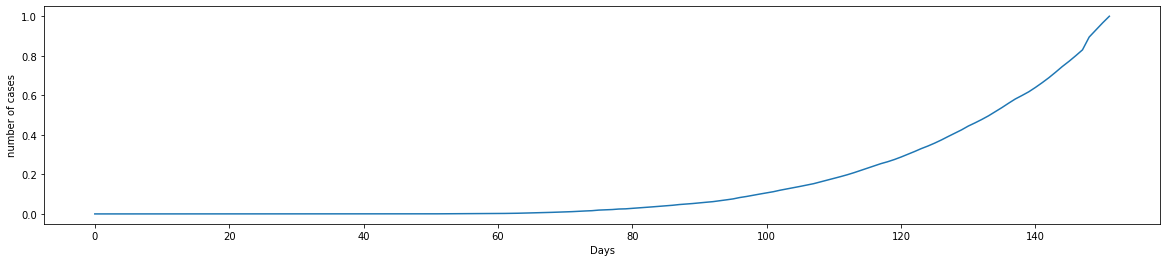

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))   
plt.ylabel('number of cases') 
plt.xlabel('Days')         
plt.plot(df1)
#https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [45]:
training_size,test_size

(98, 54)

In [46]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.78624059e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [3.57248118e-06],
       [7.14496235e-06],
       [7.14496235e-06],
       [4.46560147e-05],
       [4.82284959e-05],
       [5.00147365e-05],
       [5.53734583e-05],
       [6.43046612e-05],
       [7.68083453e-05],


In [47]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1): # we have to exclude last 99 data***
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99--->X   100---->Y 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])###??????????
	return numpy.array(dataX), numpy.array(dataY)

In [48]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [49]:
print(X_test.shape), print(ytest.shape)

(28, 25)
(28,)


(None, None)

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM ?????????????????
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

15716.937598640887

In [56]:
math.sqrt(mean_squared_error(ytest,test_predict))

365656.66103177925

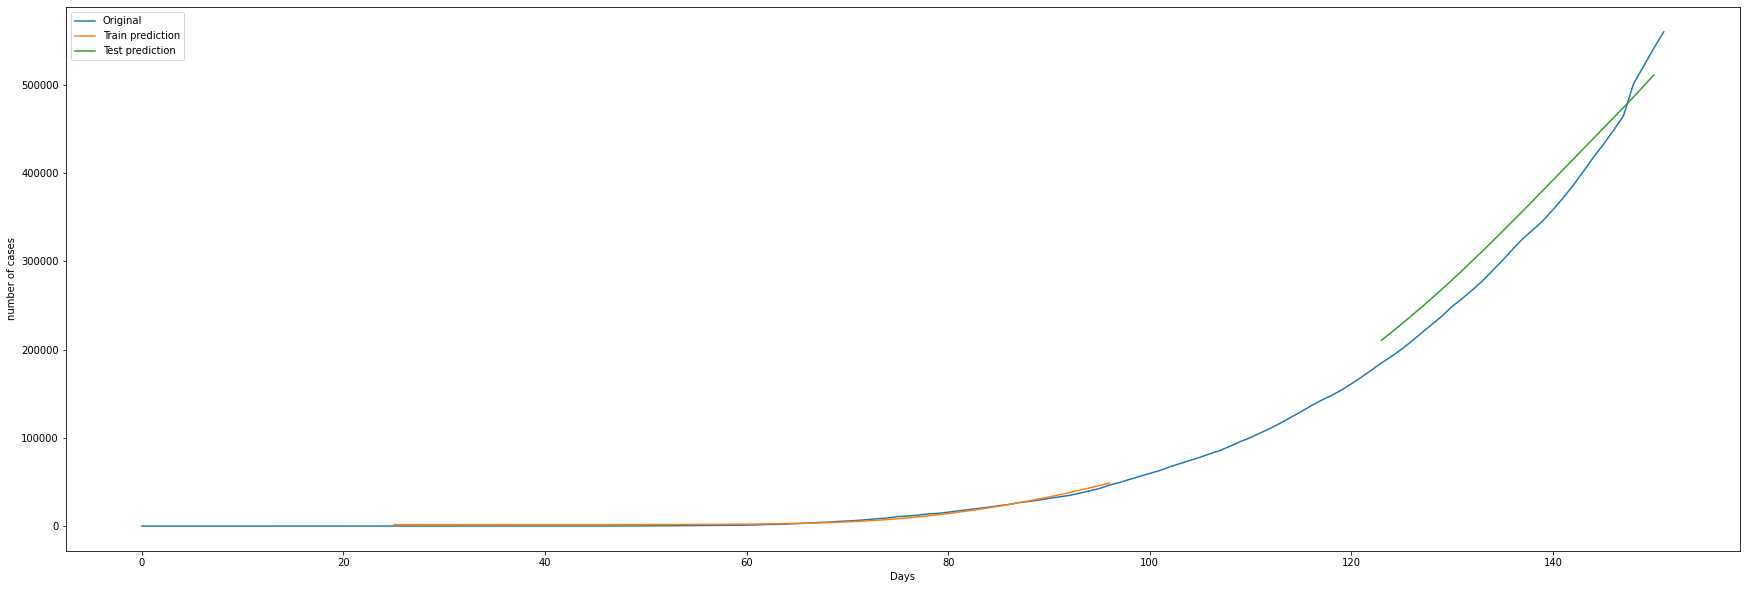

In [64]:
# shift train predictions for plotting
look_back=25

# reshape the figure
plt.figure(figsize=(30,10))

#first make empty numpy array of same size of df1
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# For plotting purpose we use following
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='Original')
plt.plot(trainPredictPlot,label='Train prediction')
plt.plot(testPredictPlot,label='Test prediction')
plt.legend()
plt.ylabel('number of cases') 
plt.xlabel('Days') 
plt.show()